# 学习曲线

## 话题引入

对于模型复杂度来说一个重要的相关性是它依赖于训练数据的规模。例如，我们创建一个数据集，具有5倍数量的样本：

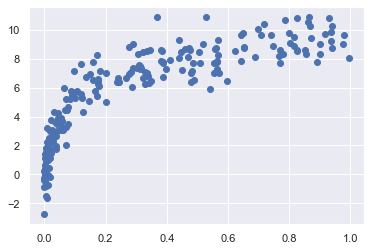

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

def make_data(N, err=1.0, rseed=1):
    # 随机数据取样生成
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

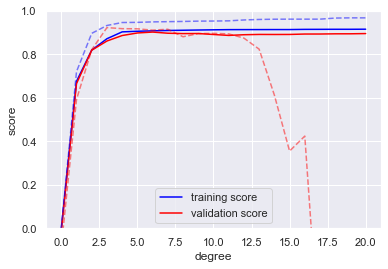

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', 
                                            param_range=degree, cv=7)

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            param_name='polynomialfeatures__degree',
                                            param_range=degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.5, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.5, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

因此我们看到了验证曲线不止有一个而是有两个重要的输入参数：模型复杂度和数据样本量。

研究模型的性能与样本量之间的关系函数经常也很有帮助，我们可以通过不断增加数据中用来训练的子数据集规模来进行研究。绘制一幅训练/验证分数随着训练集规模变化的图像被称为*学习曲线*

>从学习曲线中我们一般可以观察到下面的结论：
![](images/2022-08-23-20-50-44.png)

- 在小数据集的情况下，一个给定复杂度的模型很可能会*过拟合*：这意味着训练分数相对来说比较高而验证分数比较低。
- 在大数据集的情况下，一个给定复杂度的模型很可能会*欠拟合*：这意味着训练分数会下降而验证分数会上升。
- 一个模型应该永远（除非很偶然的情况下）在训练集给出比测试集更高的分值：这意味着两根曲线会一直接近但是不会相交。

>学习曲线的一个著名特征就是当训练样本量增加时，两根曲线会收敛。这意味着，一旦你已经有了足够的样本量使得某种模型已经收敛的话，*增加更多的训练数据不会提供任何帮助*。在这种情况下提升模型性能的唯一方法就是使用另一个（通常更复杂）的模型。